# CSCI 5454: Assignment 4

Your Name: Monish Nene


Collaborated With:


## Problem 1 (10 points)

Consider the program below:

`def findMinimum(a):
     n = len(a)
     minSoFar =  math.inf
     for i in range(n):
         if (a[i] < minSoFar):
            minSoFar = a[i] # <-- X
     return minSoFar`
     
 If $a$ is a random array of numbers $1, \ldots, n$ such that any of the $n!$ permutations is equally probable. What is the expected number of times the variable `minSoFar` is updated in the for loop (i.e, the statement marked "X" is executed)? Your answer must be a function of $n$, asymptotic notation is fine and you must show the steps/justification that you used to arrive at your answer clearly and concisely.

### Solution (Expected length: 5 lines)

>$$Probability\space that\space a[i]\space is\space lower\space than\space all\space previous\space terms\space =\space \frac{(i-1)!}{i!}=\frac{1}{i}$$

>$$Number\space of\space times\space "X"\space is\space executed\space =\space Sum\space of\space probabilities\space that\space  a[i]\space is\space lower\space than\space all\space previous\space terms\space in\space range(n)\space$$

>$$Therefore,\space Number\space of\space times\space "X"\space is\space executed\space =\space\sum_{i=1}^{n}\frac{1}{i}$$

>$$=∫_1^n\frac{1}{i}di$$

>$$=ln(n)$$

>$$Number\space of\space times\space "X"\space is\space executed\space =\space \Theta(ln(n)) = \Theta(log_2(n))$$ 

## Problem 2A (10 points)

We will now consider a scheme to randomly permute an array of size $n$. You are allowed to generate a single random bit at a time using the `random.getrandbits(1)` function. Write a function `shuffleArray` that will shuffle an input array of $n$ integers so that any permutation is equally probable.

- __Input:__ original list.
- __Return:__ shuffled list.

You __should not__ modify the original array.  You are __forbidden__ to use any random number generator other than `random.getrandbits(1)`.


In [3]:
from random import getrandbits

def shuffleArray(data):
    original_data=data
    shuffled_data=shuffleArrayrecursive(original_data)
    return shuffled_data

def shuffleArrayrecursive(data):
    ## BEGIN SOLUTION
    n = len(data)
    if n == 1:
        return data
    elif n == 2:
        if getrandbits(1):
            data[0],data[1] = data[1],data[0]
        return data
    else:
        data_1 = shuffleArrayrecursive(data[:int(n/2)])
        data_2 = shuffleArrayrecursive(data[int(n/2):])
        n_1 = len(data_1)
        n_2 = len(data_2)
        counter_1=0
        counter_2=0
        counter_merge=0
        while(counter_1 < n_1 or counter_2 < n_2):
            if counter_1 < n_1 and counter_2 < n_2:
                if getrandbits(1):
                    data[counter_merge] = data_1[counter_1]
                    counter_1 += 1
                else:
                    data[counter_merge] = data_2[counter_2]
                    counter_2 += 1
            elif counter_1 < n_1:
                data[counter_merge] = data_1[counter_1]
                counter_1 += 1
            else:
                data[counter_merge] = data_2[counter_2]
                counter_2 += 1
            counter_merge += 1
        return data
    ## END SOLUTION

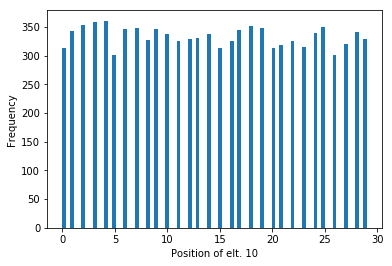

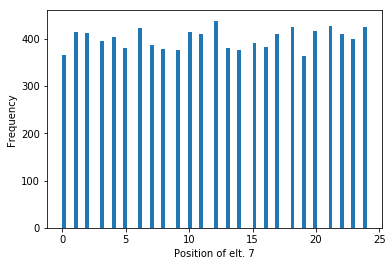

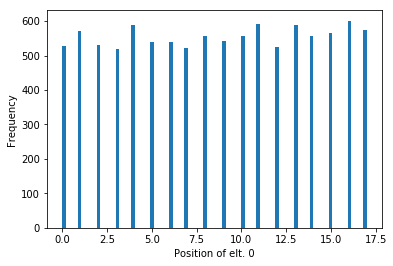

In [4]:
%matplotlib inline
## Begin statistical tests
import matplotlib.pyplot as plt

def placementTest(n, nTrials, elt):
    a = list(range(n))
    where = []
    for i in range(nTrials):
        b = shuffleArray(a)
        # find where element n/2 ended up
        j = b.index(elt)
        where.append(j)
    plt.figure("Position of elt. %d"%(elt))
    plt.hist(where, bins=80)
    plt.xlabel('Position of elt. %d'%(elt))
    plt.ylabel('Frequency')
    # TODO: Implement a xi-squared test 
    # for now let us eyeball the histograms.
    # the histograms must be near uniform. 

placementTest(30, 10000, 10)
placementTest(25, 10000, 7)
placementTest(18, 10000, 0)
       
##  End statistical tests

## Problem 2B  (5 Points)

Analyze the expected running time of your algorithm in 2(A) and expected number of random bits used?

## Answer (Expected Size: 5 lines).

>$$The\space Algorithm\space is\space similar\space to\space merge\space sort.$$ 

>$$T(N)\space=\space T(\frac{N}{2}) + T(\frac{N}{2}) + T(c) + T(cN)$$

>$$Therefore,\space By\space Master\space Method\space T(n)=\Theta(nlog_2(n))$$

>$$getrandbits(1)\space is\space used\space once\space in\space every\space recursion\space and\space 0\space times\space in\space a\space few\space end\space cases\space$$

>$$So,\space we\space can\space say\space that\space expected\space number\space of\space random\space bits\space used\space = recursions\space = nlog_2(n)+Cn = \Theta(nlog_2(n))$$

## Problem 3  (20 points)

We insert keys from $1, \ldots, n$ in a random order into a binary search tree. Throughout this problem,
node $i$ refers to a node with key $i$. The _priority_ of a node is the rank order in which it is inserted
into the tree with the root having priority $1$ and the very last node to be inserted having priority $n$.

In class, we showed that a node $i$ is the ancestor of a node $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$).

(A) State and prove a condition for node $k$ to be a leaf in the tree.  For the purposes of this problem, a node is a leaf if both its children are NIL. 

(B) What is the probability that node $k$ is a leaf? __Hint:__ Your answer should analyze nodes $1, n$ separately from nodes $2, \ldots, n-1$.

(C) Calculate the expected number of leaf nodes. Your answer should be exact: asymptotic notations or bounds are not acceptable.


### Answer (Expected Size: 15 lines)

>A) A node k is a leaf if it is not an ancestor of any other node.

>Proof: 

>Let's assume that node K is a leaf.

> As Node k is a leaf, it won't have a right child or left child.

> Node k is the ancestor of the nodes that are in the right child or left child sub trees.

> As, the node k doesn't have a right child or left child it can't have a right or left child subtree.

> Thus, we can say that there exists no such node who has the node k as ancestor.

> Therefore, we can conclude that a leaf node k is not an ancestor of any other node.


>B)

>$node\space 1\space will\space always\space be\space a\space leaf\space (left\space child\space).\space if\space k=1,\space p(1)=1$

>$node\space n\space will\space always\space be\space a\space leaf\space (right\space child\space).\space if\space k=n,\space p(n)=1$

> probability that node k is an ancestor of node i 
>$=\frac{(k-i)!}{(k-i+1)!}=\frac{1}{k-i+1},if\space k > i$
>$=\frac{(i-k)!}{(i-k+1)!}=\frac{1}{i-k+1},if\space i > k$

> node 2 to n-1 p(k) = probability that k is not an ancestor of any node  = Product of (1 - probabilty that k is an ancestor of a node 0) to (1 - probabilty that k is an ancestor of a node k-1) and (1 - probabilty that k is an ancestor of a node k+1) to (1 - probabilty that k is an ancestor of a node k+1)

>$= (1 - \frac{1}{k-1})(1 - \frac{1}{k-2})\cdots(1 - \frac{1}{k-(k-2)+1})(1 - \frac{1}{k-(k-1)+1})(1-\frac{1}{(k+1)-k+1})(1-\frac{1}{(k+2)-k+1})\cdots(1-\frac{1}{(n-2)-k+1})(1-\frac{1}{(n-1)-k+1})$

>$=(\frac{k-2}{k-1})(\frac{k-3}{k-2})\cdots(\frac{2}{3})(\frac{1}{2})(\frac{1}{2})(\frac{2}{3})\cdots(\frac{n-k-2}{n-k-1})(\frac{n-k-1}{n-k})$

>$$p(k)=\frac{1}{(k-1)(n-k)}$$

>C)$\space Number\space of\space leaves\space in\space a\space tree\space = \sum_{k=1}^{n}p(k)$

>$=p(1)+p(n)+\sum_{k=2}^{n-1}p(k)$

>$=1+1+\sum_{k=2}^{n-1}\frac{1}{(k-1)(n-k)}$

>$=1+1+\frac{1}{(2-1)(n-2)}+\frac{1}{(3-1)(n-3)}+\frac{1}{(4-1)(n-4)}+\cdots+\frac{1}{((n-2)-1)(n-(n-2))}+\frac{1}{((n-1)-1)(n-(n-1))}$

>$=1+1+\frac{1}{(1)(n-2)}+\frac{1}{(2)(n-3)}+\frac{1}{(3)(n-4)}+\cdots+\frac{1}{(n-3)(2)}+\frac{1}{(n-2)(1)}$

## Problem 4 (5 points)

We wish to rapidly find the $k^{th}$ smallest element in a skip list. Describe what extra information you would store in each node of the list and how you would find the $k^{th}$ smallest element in a skip list using this information.  What is the running time of your search in the worst case.


## Answer (Expected Size: 5 lines)

>
>

>Information stored in each node: next node pointer, down node pointer, next node serial number, data

>Start from the top most level of the skip list. If, next node serial number > k , use the down pointer for next node else use the next pointer.

>A condition will come when next node serial number = k, i.e. the next node is the kth smallest element in the skip list.

>The Worst case will be when on each level of skip list we need to move to next pointer and the down pointer.

>$Worst\space case\space running\space time\space =\space twice\space  the\space  no.\space  of\space  levels\space  of\space  skiplist\space =\space 2log_2n = \Theta(log_2(n))$